In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits import mplot3d

In [5]:
cancer = pd.read_csv(r'C:\Users\m293w\Documents\Data Science\DSI Cert\LCR\01_materials\notebooks\dataset\wdbc.csv')
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


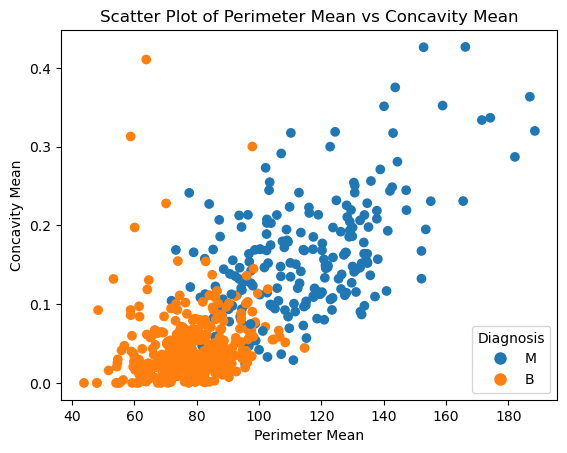

In [8]:
# Create mapping between values and colors
labels = cancer["diagnosis"].unique().tolist()
colors = list(mcolors.TABLEAU_COLORS.keys())
color_map = {l: colors[i % len(colors)] for i, l in enumerate(labels)}

# Plot
plt.scatter(cancer["perimeter_mean"], cancer['concavity_mean'], color=cancer["diagnosis"].map(color_map))

# Create custom legend handles
handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=10, markerfacecolor=color_map[label]) for label in labels]

# Add labels and legend
plt.xlabel('Perimeter Mean')
plt.ylabel('Concavity Mean')
plt.title('Scatter Plot of Perimeter Mean vs Concavity Mean')
plt.legend(handles=handles, title='Diagnosis')
plt.show()

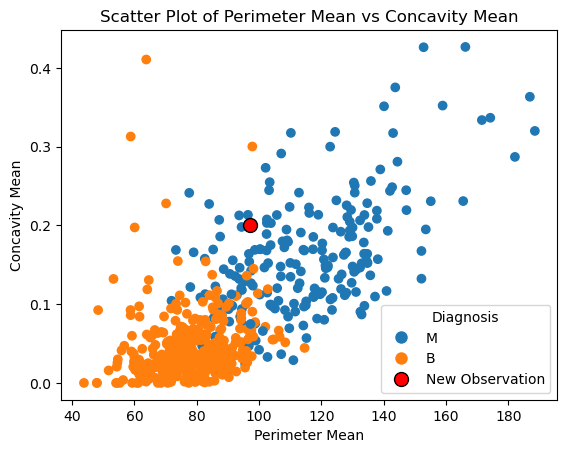

In [12]:
#Plot existing data
plt.scatter(cancer["perimeter_mean"], cancer['concavity_mean'], color=cancer["diagnosis"].map(color_map))

# Create custom legend handles
handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,markersize=10, markerfacecolor=color_map[label]) for label in labels]

# Add new observation
new_observation = {'perimeter_mean': 97, 'concavity_mean': 0.20}
plt.scatter(new_observation['perimeter_mean'], new_observation['concavity_mean'],color='red', edgecolor='black', s=100, label='New Observation')

# Add labels and legend
plt.xlabel('Perimeter Mean')
plt.ylabel('Concavity Mean')
plt.title('Scatter Plot of Perimeter Mean vs Concavity Mean')
plt.legend(handles=handles + [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markeredgecolor='black', markersize=10, label='New Observation')], title='Diagnosis')
plt.show()

In [17]:
new_obs_Perimeter = 97
new_obs_Concavity = 0.2

cancer['dist_from_new'] = (
(cancer['perimeter_mean'] - new_obs_Perimeter)**2 +
(cancer['concavity_mean'] - new_obs_Concavity)**2
) **(1/2)

cancer['dist_from_new']

0      25.800194
1      35.900178
2      33.000000
3      19.420044
4      38.100000
         ...    
564    45.000021
565    34.200046
566    11.300511
567    43.100266
568    49.080407
Name: dist_from_new, Length: 569, dtype: float64

In [18]:
nearest_5 = cancer.nsmallest(5, 'dist_from_new')[[
    'perimeter_mean',
    'concavity_mean',
    'diagnosis',
    'dist_from_new'
]]
nearest_5

,perimeter_mean,concavity_mean,diagnosis,dist_from_new
291,97.03,0.05940,B,0.143765
138,96.85,0.15390,M,0.156924
15,96.73,0.16390,M,0.272403
514,97.26,0.07486,M,0.288548
54,97.26,0.05253,M,0.298910


<module 'matplotlib.pyplot' from 'c:\\Users\\m293w\\miniconda3\\envs\\dsi_participant\\lib\\site-packages\\matplotlib\\pyplot.py'>

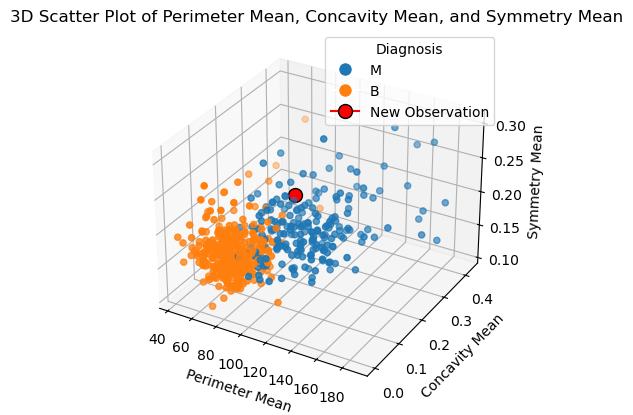

In [19]:
# Create mapping between values and colors
labels = cancer["diagnosis"].unique().tolist()
colors = list(mcolors.TABLEAU_COLORS.keys())
color_map = {l: colors[i % len(colors)] for i, l in enumerate(labels)}

# Create a 3D plot
ax = plt.axes(projection="3d")

# Plot data points with color corresponding to diagnosis
sc = ax.scatter3D(cancer['perimeter_mean'], cancer['concavity_mean'], cancer['symmetry_mean'], c=cancer['diagnosis'].map(color_map), marker='o')

# Define the new observation
new_observation = {'perimeter_mean': 97, 'concavity_mean': 0.20, 'symmetry_mean': 0.22}

# Plot the new observation
ax.scatter3D(new_observation['perimeter_mean'], new_observation['concavity_mean'], new_observation['symmetry_mean'], color='red', edgecolor='black', s=100, marker='o', label='New Observation')
# Add axis labels
ax.set_xlabel('Perimeter Mean')
ax.set_ylabel('Concavity Mean')
ax.set_zlabel('Symmetry Mean')
ax.set_title('3D Scatter Plot of Perimeter Mean, Concavity Mean, and Symmetry Mean')

# Create custom legend handles
handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=10, markerfacecolor=color_map[label]) for label in labels]

# Add custom legend for new observation
handles.append(plt.Line2D([0], [0], marker='o', color='red', label='New Observation', markersize=10, markeredgecolor='black'))

# Add legend
plt.legend(handles=handles, title='Diagnosis')

# Show plot
plt

In [22]:
new_obs_Perimeter = 97
new_obs_Concavity = 0.2
new_obs_Symmetry = 0.22

cancer['dist_from_new']=(
(cancer['perimeter_mean'] - new_obs_Perimeter) **2 +
(cancer['concavity_mean'] - new_obs_Concavity) **2 +
(cancer['symmetry_mean'] - new_obs_Symmetry) **2
) **(1/2)

cancer['dist_from_new']

0      25.800203
1      35.900199
2      33.000003
3      19.420085
4      38.100020
         ...    
564    45.000046
565    34.200075
566    11.300676
567    43.100270
568    49.080446
Name: dist_from_new, Length: 569, dtype: float64

In [24]:
nearest_5 = cancer.nsmallest(5, 'dist_from_new')[[
    'perimeter_mean',
    'concavity_mean',
    'diagnosis',
    'dist_from_new'
]]
nearest_5

,perimeter_mean,concavity_mean,diagnosis,dist_from_new
291,97.03,0.05940,B,0.147305
138,96.85,0.15390,M,0.158795
15,96.73,0.16390,M,0.272597
514,97.26,0.07486,M,0.295539
54,97.26,0.05253,M,0.304562


In [26]:
from sklearn import set_config
set_config(transform_output = 'pandas')

from sklearn.neighbors import KNeighborsClassifier

In [27]:
cancer_train = cancer[['diagnosis','perimeter_mean', 'concavity_mean']]
cancer_train

,diagnosis,perimeter_mean,concavity_mean
0,M,122.80,0.30010
1,M,132.90,0.08690
2,M,130.00,0.19740
3,M,77.58,0.24140
4,M,135.10,0.19800
...,...,...,...
564,M,142.00,0.24390
565,M,131.20,0.14400
566,M,108.30,0.09251
567,M,140.10,0.35140


In [28]:
knn = KNeighborsClassifier(n_neighbors=5)
knn

KNeighborsClassifier()

In [31]:
X = cancer_train[['perimeter_mean', 'concavity_mean']]
y = cancer_train[['diagnosis']]
knn.fit(X, y)
new_obs = pd.DataFrame({'perimeter_mean':[97], 'concavity_mean':[0.2]})
knn.predict(new_obs)

c:\Users\m293w\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array(['M'], dtype=object)